# Covid-19 UK Dataset
This dataset stores information on Covis-19 data  , The frequency of cases and vaccination varies widely over time. This dataset contains information like areaType, areaName, areaCode, date, newCasesBySpecimenDate, cumCasesBySpecimenDate, newFirstEpisodesBySpecimenDate, cumFirstEpisodesBySpecimenDate, newReinfectionsBySpecimenDate, cumReinfectionsBySpecimenDate, newVaccinesGivenByPublishDate, cumVaccinesGivenByPublishDate, newPeopleVaccinatedFirstDoseByPublishDate, cumPeopleVaccinatedFirstDoseByPublishDate, newPeopleVaccinatedSecondDoseByPublishDate, cumPeopleVaccinatedSecondDoseByPublishDate, newPeopleVaccinatedThirdInjectionByPublishDate, cumPeopleVaccinatedThirdInjectionByPublishDate etc.
- Reference
https://www.geeksforgeeks.org/ https://plotly.com/python/

In [2]:

import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode,plot,iplot


# Covid Cases

### Reading CSV file

In [30]:
#https://stackoverflow.com/questions/61393542/reading-a-huge-csv-file-in-jupyter-notebook

cases=pd.read_csv('C:/Users/HP/Downloads/covid cases.csv') 
cases

,areaType,areaName,areaCode,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate
0,nation,England,E92000001,2023-04-19,1002,20784719,591,19241754,411.0,1542965.0
1,nation,England,E92000001,2023-04-18,1611,20783717,994,19241163,617.0,1542554.0
2,nation,England,E92000001,2023-04-17,1901,20782106,1181,19240169,720.0,1541937.0
3,nation,England,E92000001,2023-04-16,1740,20780205,1076,19238988,664.0,1541217.0
4,nation,England,E92000001,2023-04-15,1238,20778465,764,19237912,474.0,1540553.0
...,...,...,...,...,...,...,...,...,...,...
1171,nation,England,E92000001,2020-02-03,18,20,18,20,NaN,NaN
1172,nation,England,E92000001,2020-02-02,1,2,1,2,NaN,NaN
1173,nation,England,E92000001,2020-02-01,0,1,0,1,NaN,NaN
1174,nation,England,E92000001,2020-01-31,0,1,0,1,NaN,NaN


#### Information of the dataframe

In [31]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   areaType                        1176 non-null   object 
 1   areaName                        1176 non-null   object 
 2   areaCode                        1176 non-null   object 
 3   date                            1176 non-null   object 
 4   newCasesBySpecimenDate          1176 non-null   int64  
 5   cumCasesBySpecimenDate          1176 non-null   int64  
 6   newFirstEpisodesBySpecimenDate  1176 non-null   int64  
 7   cumFirstEpisodesBySpecimenDate  1176 non-null   int64  
 8   newReinfectionsBySpecimenDate   1035 non-null   float64
 9   cumReinfectionsBySpecimenDate   1035 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 92.0+ KB


#### Checking null values

In [32]:
cases.isnull().sum()

areaType                            0
areaName                            0
areaCode                            0
date                                0
newCasesBySpecimenDate              0
cumCasesBySpecimenDate              0
newFirstEpisodesBySpecimenDate      0
cumFirstEpisodesBySpecimenDate      0
newReinfectionsBySpecimenDate     141
cumReinfectionsBySpecimenDate     141
dtype: int64

In [33]:
#fill null values with appropriate value using aggregate function such as mean, median or mode
def impute_median(series):
        return series.fillna(series.median())


In [34]:
cases.newReinfectionsBySpecimenDate = cases['newReinfectionsBySpecimenDate'].transform(impute_median)
cases.cumReinfectionsBySpecimenDate = cases['cumReinfectionsBySpecimenDate'].transform(impute_median)

In [35]:
cases.isnull().sum() #checking for null values

areaType                          0
areaName                          0
areaCode                          0
date                              0
newCasesBySpecimenDate            0
cumCasesBySpecimenDate            0
newFirstEpisodesBySpecimenDate    0
cumFirstEpisodesBySpecimenDate    0
newReinfectionsBySpecimenDate     0
cumReinfectionsBySpecimenDate     0
dtype: int64

#### Reverse the rows to analyse from 2020

In [36]:
Reverse_cases=cases.iloc[::-1].reset_index(drop=True)

In [134]:
fig=px.line(cases,x='date',y='newCasesBySpecimenDate', title='COVID-19 Cases') # using plotly plotting the curve
fig.show()

The increase in cases over time is shown in the graph.

In [39]:
fig=px.line(cases,x='date',y='cumCasesBySpecimenDate', title='COVID-19 Cases Daily Cumulative')
fig.show()

Cummilative covid-19 cases from April 2020 to Apr 2023 is 22 Million

In [44]:
fig=px.line(cases,x='date',y='newReinfectionsBySpecimenDate', title='COVID-19 Cases')
fig.show()

In [135]:
fig=px.line(cases,x='date',y='cumReinfectionsBySpecimenDate', title='COVID-19 Cases Daily Cumulative')
fig.show()

## Vaccinations

In [47]:
# Reading csv file
vaccines=pd.read_csv('C:/Users/HP/Downloads/Vaccinations.csv')
vaccines

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedThirdInjectionByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
0,nation,England,E92000001,2023-04-02,46.0,144793337,16.0,45417090,30.0,42951064,NaN,33906503.0
1,nation,England,E92000001,2023-04-01,471.0,144793291,167.0,45417074,293.0,42951034,2.0,33906503.0
2,nation,England,E92000001,2023-03-31,358.0,144792820,118.0,45416907,214.0,42950741,5.0,33906501.0
3,nation,England,E92000001,2023-03-30,148.0,144792462,52.0,45416789,79.0,42950527,2.0,33906496.0
4,nation,England,E92000001,2023-03-29,295.0,144792314,101.0,45416737,165.0,42950448,5.0,33906494.0
...,...,...,...,...,...,...,...,...,...,...,...,...
808,nation,England,E92000001,2021-01-14,279647.0,3189674,274793.0,2769164,4854.0,420510,NaN,NaN
809,nation,England,E92000001,2021-01-13,248177.0,2910027,239815.0,2494371,8362.0,415656,NaN,NaN
810,nation,England,E92000001,2021-01-12,187645.0,2661850,174276.0,2254556,13369.0,407294,NaN,NaN
811,nation,England,E92000001,2021-01-11,140441.0,2474205,121129.0,2080280,19312.0,393925,NaN,NaN


In [48]:
# checking the datatypes of the columns
vaccines.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   areaType                                        813 non-null    object 
 1   areaName                                        813 non-null    object 
 2   areaCode                                        813 non-null    object 
 3   date                                            813 non-null    object 
 4   newVaccinesGivenByPublishDate                   812 non-null    float64
 5   cumVaccinesGivenByPublishDate                   813 non-null    int64  
 6   newPeopleVaccinatedFirstDoseByPublishDate       812 non-null    float64
 7   cumPeopleVaccinatedFirstDoseByPublishDate       813 non-null    int64  
 8   newPeopleVaccinatedSecondDoseByPublishDate      812 non-null    float64
 9   cumPeopleVaccinatedSecondDoseByPublishDate 

In [49]:
#checking null values
vaccines.isnull().sum() 

areaType                                            0
areaName                                            0
areaCode                                            0
date                                                0
newVaccinesGivenByPublishDate                       1
cumVaccinesGivenByPublishDate                       0
newPeopleVaccinatedFirstDoseByPublishDate           1
cumPeopleVaccinatedFirstDoseByPublishDate           0
newPeopleVaccinatedSecondDoseByPublishDate          1
cumPeopleVaccinatedSecondDoseByPublishDate          0
newPeopleVaccinatedThirdInjectionByPublishDate    265
cumPeopleVaccinatedThirdInjectionByPublishDate    263
dtype: int64

In [51]:
#interpolating
vaccines['newVaccinesGivenByPublishDate'].fillna(vaccines['newVaccinesGivenByPublishDate'].interpolate(method='linear', limit_direction='forward') , inplace=True)
vaccines['newPeopleVaccinatedFirstDoseByPublishDate'].fillna(vaccines['newPeopleVaccinatedFirstDoseByPublishDate'].interpolate(method='linear', limit_direction='forward') , inplace=True)
vaccines['newPeopleVaccinatedSecondDoseByPublishDate'].fillna(vaccines['newPeopleVaccinatedSecondDoseByPublishDate'].interpolate(method='linear', limit_direction='forward') , inplace=True)
vaccines['newPeopleVaccinatedThirdInjectionByPublishDate'].fillna(vaccines['newPeopleVaccinatedThirdInjectionByPublishDate'].interpolate(method='linear', limit_direction='forward') , inplace=True)
vaccines['cumPeopleVaccinatedThirdInjectionByPublishDate'].fillna(vaccines['cumPeopleVaccinatedThirdInjectionByPublishDate'].interpolate(method='linear', limit_direction='forward') , inplace=True)


In [52]:
vaccines.isnull().sum()

areaType                                          0
areaName                                          0
areaCode                                          0
date                                              0
newVaccinesGivenByPublishDate                     0
cumVaccinesGivenByPublishDate                     0
newPeopleVaccinatedFirstDoseByPublishDate         0
cumPeopleVaccinatedFirstDoseByPublishDate         0
newPeopleVaccinatedSecondDoseByPublishDate        0
cumPeopleVaccinatedSecondDoseByPublishDate        0
newPeopleVaccinatedThirdInjectionByPublishDate    1
cumPeopleVaccinatedThirdInjectionByPublishDate    0
dtype: int64

In [53]:
vaccines.dropna(inplace=True) #Dropping rows which has null values

In [54]:
vaccines.isnull().sum()

areaType                                          0
areaName                                          0
areaCode                                          0
date                                              0
newVaccinesGivenByPublishDate                     0
cumVaccinesGivenByPublishDate                     0
newPeopleVaccinatedFirstDoseByPublishDate         0
cumPeopleVaccinatedFirstDoseByPublishDate         0
newPeopleVaccinatedSecondDoseByPublishDate        0
cumPeopleVaccinatedSecondDoseByPublishDate        0
newPeopleVaccinatedThirdInjectionByPublishDate    0
cumPeopleVaccinatedThirdInjectionByPublishDate    0
dtype: int64

In [55]:
vaccines

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedThirdInjectionByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
1,nation,England,E92000001,2023-04-01,471.0,144793291,167.0,45417074,293.0,42951034,2.0,33906503.0
2,nation,England,E92000001,2023-03-31,358.0,144792820,118.0,45416907,214.0,42950741,5.0,33906501.0
3,nation,England,E92000001,2023-03-30,148.0,144792462,52.0,45416789,79.0,42950527,2.0,33906496.0
4,nation,England,E92000001,2023-03-29,295.0,144792314,101.0,45416737,165.0,42950448,5.0,33906494.0
5,nation,England,E92000001,2023-03-28,246.0,144792019,82.0,45416636,146.0,42950283,1.0,33906489.0
...,...,...,...,...,...,...,...,...,...,...,...,...
808,nation,England,E92000001,2021-01-14,279647.0,3189674,274793.0,2769164,4854.0,420510,153160.0,863460.0
809,nation,England,E92000001,2021-01-13,248177.0,2910027,239815.0,2494371,8362.0,415656,153160.0,863460.0
810,nation,England,E92000001,2021-01-12,187645.0,2661850,174276.0,2254556,13369.0,407294,153160.0,863460.0
811,nation,England,E92000001,2021-01-11,140441.0,2474205,121129.0,2080280,19312.0,393925,153160.0,863460.0


In [60]:
#https://stackoverflow.com/questions/59251630/pandas-style-background-gradient-not-showing-in-jupyter-notebook

vaccines.style.background_gradient(cmap='Greys') # vaccinations by Grey color

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedThirdInjectionByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
1,nation,England,E92000001,2023-04-01,471.000000,144793291,167.000000,45417074,293.000000,42951034,2.000000,33906503.000000
2,nation,England,E92000001,2023-03-31,358.000000,144792820,118.000000,45416907,214.000000,42950741,5.000000,33906501.000000
3,nation,England,E92000001,2023-03-30,148.000000,144792462,52.000000,45416789,79.000000,42950527,2.000000,33906496.000000
4,nation,England,E92000001,2023-03-29,295.000000,144792314,101.000000,45416737,165.000000,42950448,5.000000,33906494.000000
5,nation,England,E92000001,2023-03-28,246.000000,144792019,82.000000,45416636,146.000000,42950283,1.000000,33906489.000000
6,nation,England,E92000001,2023-03-27,592.000000,144791773,174.000000,45416554,248.000000,42950137,36.000000,33906488.000000
7,nation,England,E92000001,2023-03-26,193.000000,144791181,50.000000,45416380,140.000000,42949889,1.000000,33906452.000000
8,nation,England,E92000001,2023-03-25,1037.000000,144790988,337.000000,45416330,671.000000,42949749,7.000000,33906451.000000
9,nation,England,E92000001,2023-03-24,393.000000,144789951,123.000000,45415993,234.000000,42949078,4.000000,33906444.000000
10,nation,England,E92000001,2023-03-23,357.000000,144789558,125.000000,45415870,204.000000,42948844,5.000000,33906440.000000


#### Maximum 1st dose vaccination

In [71]:
vaccines[vaccines['newPeopleVaccinatedFirstDoseByPublishDate'] >= 500000]

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedThirdInjectionByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
743,nation,England,E92000001,2021-03-20,756873.0,25150632,686424.0,23559503,70449.0,1591129,153160.0,863460.0
744,nation,England,E92000001,2021-03-19,636219.0,24393759,535489.0,22873079,100730.0,1520680,153160.0,863460.0
792,nation,England,E92000001,2021-01-30,549943.0,8251146,539691.0,7792996,10252.0,458150,153160.0,863460.0


Maximum first dose vaccination per day is on January 1st 2021, March 19th and 20th 2021

#### Maximum 2nd dose vaccination

In [77]:
vaccines[vaccines['newPeopleVaccinatedSecondDoseByPublishDate'] >= 400000]

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedThirdInjectionByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
666,nation,England,E92000001,2021-06-05,590645.0,57193641,175001.0,33700486,415644.0,23493155,153160.0,863460.0
680,nation,England,E92000001,2021-05-22,686264.0,50932666,178251.0,31725097,508013.0,19207569,153160.0,863460.0
690,nation,England,E92000001,2021-05-12,549458.0,45908796,146934.0,29973113,402524.0,15935683,153160.0,863460.0
694,nation,England,E92000001,2021-05-08,541513.0,44449424,137003.0,29578216,404510.0,14871208,153160.0,863460.0
695,nation,England,E92000001,2021-05-07,522249.0,43907911,107518.0,29441213,414731.0,14466698,153160.0,863460.0
696,nation,England,E92000001,2021-05-06,520826.0,43385662,101594.0,29333695,419232.0,14051967,153160.0,863460.0
708,nation,England,E92000001,2021-04-24,602866.0,38792402,124858.0,28227710,478008.0,10564692,153160.0,863460.0
715,nation,England,E92000001,2021-04-17,570975.0,35882008,112095.0,27559381,458880.0,8322627,153160.0,863460.0
716,nation,England,E92000001,2021-04-16,548305.0,35311033,102280.0,27447286,446025.0,7863747,153160.0,863460.0
722,nation,England,E92000001,2021-04-10,511497.0,33248869,74055.0,27070991,437442.0,6177878,153160.0,863460.0


#### Maximum 3rd dose vaccination

In [82]:
vaccines[vaccines['newPeopleVaccinatedThirdInjectionByPublishDate'] >= 400000]

,areaType,areaName,areaCode,date,newVaccinesGivenByPublishDate,cumVaccinesGivenByPublishDate,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate,newPeopleVaccinatedThirdInjectionByPublishDate,cumPeopleVaccinatedThirdInjectionByPublishDate
465,nation,England,E92000001,2021-12-23,562336.0,110173792,29980.0,43388547,39323.0,39657294,493033.0,27127951.0
466,nation,England,E92000001,2021-12-22,778244.0,109611456,35657.0,43358567,47314.0,39617971,695273.0,26634918.0
467,nation,England,E92000001,2021-12-21,893992.0,108833212,36309.0,43322910,48491.0,39570657,809192.0,25939645.0
468,nation,England,E92000001,2021-12-20,834540.0,107939220,36092.0,43286601,44655.0,39522166,753793.0,25130453.0
469,nation,England,E92000001,2021-12-19,792629.0,107104680,30298.0,43250509,36136.0,39477511,726195.0,24376660.0
470,nation,England,E92000001,2021-12-18,906656.0,106312051,35141.0,43220211,41112.0,39441375,830403.0,23650465.0
471,nation,England,E92000001,2021-12-17,808031.0,105405395,29563.0,43185070,37693.0,39400263,740775.0,22820062.0
472,nation,England,E92000001,2021-12-16,807047.0,104597364,29554.0,43155507,37626.0,39362570,739867.0,22079287.0
473,nation,England,E92000001,2021-12-15,684852.0,103790317,24607.0,43125953,33399.0,39324944,626846.0,21339420.0
474,nation,England,E92000001,2021-12-14,611976.0,103105465,30807.0,43101346,33130.0,39291545,548039.0,20712574.0


In [133]:
fig=px.line(vaccines,x='date',y=['cumPeopleVaccinatedFirstDoseByPublishDate','cumPeopleVaccinatedSecondDoseByPublishDate','cumPeopleVaccinatedThirdInjectionByPublishDate'], title='COVID-19 Vaccination stats ')
fig.show()

#### Daily vaccination stats 

In [132]:
fig=px.line(vaccines,x='date',y=['newPeopleVaccinatedFirstDoseByPublishDate','newPeopleVaccinatedSecondDoseByPublishDate','newPeopleVaccinatedThirdInjectionByPublishDate'], title='COVID-19 Vaccination stats ')
fig.show()

#### Vaccination percentage

In [94]:
# Reading csv file
vaccination_percentage=pd.read_csv('C:/Users/HP/Downloads/vaccination percentage.csv')
vaccination_percentage

,areaType,areaName,areaCode,date,cumVaccinationFirstDoseUptakeByPublishDatePercentage,cumVaccinationSecondDoseUptakeByPublishDatePercentage,cumVaccinationThirdInjectionUptakeByPublishDatePercentage
0,nation,England,E92000001,2023-04-02,93.9,88.8,70.1
1,nation,England,E92000001,2023-04-01,93.9,88.8,70.1
2,nation,England,E92000001,2023-03-31,93.9,88.8,70.1
3,nation,England,E92000001,2023-03-30,93.9,88.8,70.1
4,nation,England,E92000001,2023-03-29,93.9,88.8,70.1
...,...,...,...,...,...,...,...
808,nation,England,E92000001,2021-01-14,5.7,0.9,NaN
809,nation,England,E92000001,2021-01-13,5.2,0.9,NaN
810,nation,England,E92000001,2021-01-12,4.7,0.8,NaN
811,nation,England,E92000001,2021-01-11,4.3,0.8,NaN


In [95]:
#checking null values
vaccination_percentage.isnull().sum()

areaType                                                       0
areaName                                                       0
areaCode                                                       0
date                                                           0
cumVaccinationFirstDoseUptakeByPublishDatePercentage           0
cumVaccinationSecondDoseUptakeByPublishDatePercentage          0
cumVaccinationThirdInjectionUptakeByPublishDatePercentage    263
dtype: int64

In [97]:
#interpolating null values
vaccination_percentage['cumVaccinationThirdInjectionUptakeByPublishDatePercentage'].fillna(vaccination_percentage['cumVaccinationThirdInjectionUptakeByPublishDatePercentage'].interpolate(method='linear', limit_direction='forward') , inplace=True)


In [98]:
vaccination_percentage.isnull().sum()

areaType                                                     0
areaName                                                     0
areaCode                                                     0
date                                                         0
cumVaccinationFirstDoseUptakeByPublishDatePercentage         0
cumVaccinationSecondDoseUptakeByPublishDatePercentage        0
cumVaccinationThirdInjectionUptakeByPublishDatePercentage    0
dtype: int64

In [99]:
vaccination_percentage

,areaType,areaName,areaCode,date,cumVaccinationFirstDoseUptakeByPublishDatePercentage,cumVaccinationSecondDoseUptakeByPublishDatePercentage,cumVaccinationThirdInjectionUptakeByPublishDatePercentage
0,nation,England,E92000001,2023-04-02,93.9,88.8,70.1
1,nation,England,E92000001,2023-04-01,93.9,88.8,70.1
2,nation,England,E92000001,2023-03-31,93.9,88.8,70.1
3,nation,England,E92000001,2023-03-30,93.9,88.8,70.1
4,nation,England,E92000001,2023-03-29,93.9,88.8,70.1
...,...,...,...,...,...,...,...
808,nation,England,E92000001,2021-01-14,5.7,0.9,1.8
809,nation,England,E92000001,2021-01-13,5.2,0.9,1.8
810,nation,England,E92000001,2021-01-12,4.7,0.8,1.8
811,nation,England,E92000001,2021-01-11,4.3,0.8,1.8


In [131]:
fig=px.line(vaccination_percentage,x='date',y=['cumVaccinationFirstDoseUptakeByPublishDatePercentage','cumVaccinationSecondDoseUptakeByPublishDatePercentage','cumVaccinationThirdInjectionUptakeByPublishDatePercentage'], title='COVID-19 Vaccination percentage  ')
fig.show()

### Death
#### Weekly death analysis

In [86]:
#Reading csv file
weekly_death=pd.read_csv('C:/Users/HP/Downloads/weekly death.csv')
weekly_death

,areaType,areaName,areaCode,date,newWeeklyNsoDeathsByRegDate,cumWeeklyNsoDeathsByRegDate
0,nation,England,E92000001,2023-04-07,484,186259
1,nation,England,E92000001,2023-03-31,599,185775
2,nation,England,E92000001,2023-03-24,584,185176
3,nation,England,E92000001,2023-03-17,512,184592
4,nation,England,E92000001,2023-03-10,521,184080
...,...,...,...,...,...,...
156,nation,England,E92000001,2020-04-10,5899,9849
157,nation,England,E92000001,2020-04-03,3330,3950
158,nation,England,E92000001,2020-03-27,515,620
159,nation,England,E92000001,2020-03-20,100,105


In [87]:
#checking null values
weekly_death.isnull().sum()

areaType                       0
areaName                       0
areaCode                       0
date                           0
newWeeklyNsoDeathsByRegDate    0
cumWeeklyNsoDeathsByRegDate    0
dtype: int64

#### Maximum number of deaths

In [90]:
weekly_death[weekly_death['newWeeklyNsoDeathsByRegDate']>=8000]

,areaType,areaName,areaCode,date,newWeeklyNsoDeathsByRegDate,cumWeeklyNsoDeathsByRegDate
114,nation,England,E92000001,2021-01-29,8063,104165
155,nation,England,E92000001,2020-04-17,8335,18184


In [91]:
weekly_death[weekly_death['newWeeklyNsoDeathsByRegDate'] == weekly_death['newWeeklyNsoDeathsByRegDate'].max()]

,areaType,areaName,areaCode,date,newWeeklyNsoDeathsByRegDate,cumWeeklyNsoDeathsByRegDate
155,nation,England,E92000001,2020-04-17,8335,18184


On April 17, the UK records its highest number of cases.

In [92]:
fig=px.line(weekly_death,x='date',y='newWeeklyNsoDeathsByRegDate', title='COVID-19 Deaths Weekly ')
fig.show()

The data shows that the number of deaths is higher before vaccinations, in the months of April and January, when new strains are more likely to appear, and when covid restrictions are simpler.

In [101]:
fig=px.line(weekly_death,x='date',y='cumWeeklyNsoDeathsByRegDate', title='COVID-19 Deaths Weekly Cummilative ')
fig.show()

We observe that the increase in COVID-19 vaccinations has significantly lowered the death rate.
Despite a high number of cases in January 2023, from April 2021 through that month, the death rate is low.

In [102]:
fig=px.line(vaccination_percentage,x='date',y=['cumVaccinationFirstDoseUptakeByPublishDatePercentage','cumVaccinationSecondDoseUptakeByPublishDatePercentage','cumVaccinationThirdInjectionUptakeByPublishDatePercentage'], title='COVID-19 Vaccination percentage  ')
fig.show()

#### deaths on daily basis

In [103]:
#reading csv file
daily_death=pd.read_csv('C:/Users/HP/Downloads/daily death.csv')
daily_death

,areaType,areaName,areaCode,date,newDailyNsoDeathsByDeathDate,cumDailyNsoDeathsByDeathDate
0,nation,England,E92000001,2023-03-24,92,189338
1,nation,England,E92000001,2023-03-23,84,189246
2,nation,England,E92000001,2023-03-22,75,189162
3,nation,England,E92000001,2023-03-21,98,189087
4,nation,England,E92000001,2023-03-20,72,188989
...,...,...,...,...,...,...
1145,nation,England,E92000001,2020-02-03,0,2
1146,nation,England,E92000001,2020-02-02,1,2
1147,nation,England,E92000001,2020-02-01,0,1
1148,nation,England,E92000001,2020-01-31,0,1


In [104]:
daily_death.isnull().sum()

areaType                        0
areaName                        0
areaCode                        0
date                            0
newDailyNsoDeathsByDeathDate    0
cumDailyNsoDeathsByDeathDate    0
dtype: int64

In [108]:
fig = px.line(daily_death,x='date',y='cumDailyNsoDeathsByDeathDate', title='COVID-19 Daily')
fig.show()

In [109]:
fig=px.line(daily_death,x='date',y='newDailyNsoDeathsByDeathDate', title='COVID-19 Daily Deaths ')
fig.show()

#### 1. The cumulative COVID-19 cases in the UK is positively correlated with the cumulative people vaccinated in the UK.


In [110]:
merged_df = pd.merge(cases, vaccines, on='date')


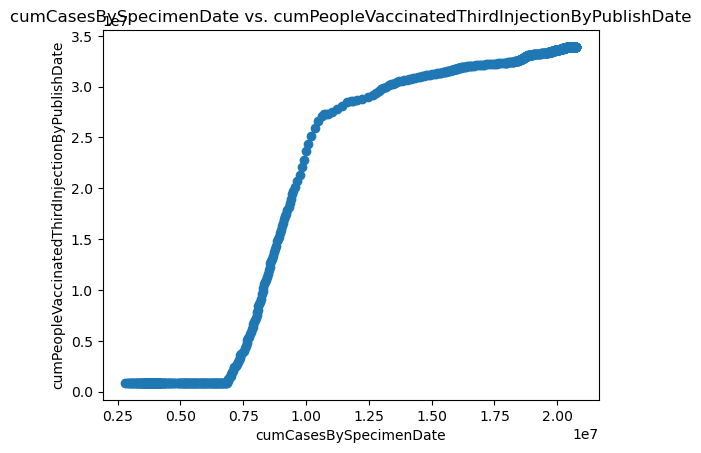

In [119]:
x = 'cumCasesBySpecimenDate'
y = 'cumPeopleVaccinatedThirdInjectionByPublishDate'

plt.scatter(merged_df[x], merged_df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'{x} vs. {y}')
plt.show()

####  2. The rise in vaccination curve daily, weekly inversly proportional to deaths curve or death rate is decreased in the year 2021 to march 2023

In [120]:
merged_df1 = pd.merge(vaccines, daily_death, on='date')

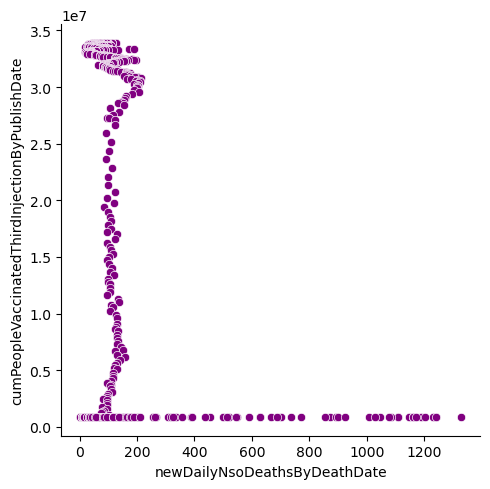

In [130]:
sns.relplot(x='newDailyNsoDeathsByDeathDate', y='cumPeopleVaccinatedThirdInjectionByPublishDate', color='purple', data=merged_df1)
